In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load dataset
df = pd.read_json('output.json')

df.isnull().sum()

interview_title       0
date                 30
offer_acceptance      0
experience_rating     0
interview_rating      0
interview_process     0
dtype: int64

In [27]:
df.dropna(inplace = True)

In [28]:
df.isnull().sum()

interview_title      0
date                 0
offer_acceptance     0
experience_rating    0
interview_rating     0
interview_process    0
dtype: int64

In [29]:
df.head()

,interview_title,date,offer_acceptance,experience_rating,interview_rating,interview_process
30,Customer Success Manager Interview,2021-09-10,No Offer,Positive Experience,Average Interview,"First interview completed so far, haven't been..."
31,Sr. Software engineering Manager Interview,2023-04-26,Accepted Offer,Positive Experience,Average Interview,"- 30 min chat with recruiter, both decided to ..."
32,Software Engineer Interview,2023-04-25,No Offer,Positive Experience,Average Interview,Great process - I had a coding interview and a...
33,Product Manager Interview,2023-04-25,No Offer,Positive Experience,Average Interview,Fair and reasonable. Focus on accessibility. D...
34,Executive Assistant Interview,2023-04-25,Accepted Offer,Neutral Experience,Average Interview,Interview process was long but worth it. I bel...


In [30]:
# Encode categorical columns
le = LabelEncoder()
df['offer_acceptance'] = le.fit_transform(df['offer_acceptance'])
df['experience_rating'] = le.fit_transform(df['experience_rating'])
df['interview_rating'] = le.fit_transform(df['interview_rating'])

In [31]:
df.head()

,interview_title,date,offer_acceptance,experience_rating,interview_rating,interview_process
30,Customer Success Manager Interview,2021-09-10,2,5,0,"First interview completed so far, haven't been..."
31,Sr. Software engineering Manager Interview,2023-04-26,0,5,0,"- 30 min chat with recruiter, both decided to ..."
32,Software Engineer Interview,2023-04-25,2,5,0,Great process - I had a coding interview and a...
33,Product Manager Interview,2023-04-25,2,5,0,Fair and reasonable. Focus on accessibility. D...
34,Executive Assistant Interview,2023-04-25,0,4,0,Interview process was long but worth it. I bel...


In [32]:
# Apply CountVectorizer and TfidfVectorizer to text columns
preprocessor = ColumnTransformer(
    transformers=[
        ('title_count', CountVectorizer(), 'interview_title'),
        ('process_count', CountVectorizer(), 'interview_process'),
        ('title_tfidf', TfidfVectorizer(), 'interview_title'),
        ('process_tfidf', TfidfVectorizer(), 'interview_process')
    ],
    remainder='passthrough'
)

In [33]:
# Split the dataset into training and testing sets
X = df[['interview_title', 'experience_rating', 'interview_rating', 'interview_process']]

y = df['offer_acceptance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Define classifiers and parameter grids
classifiers = [
    ('Logistic Regression', LogisticRegression(), {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    }),
    
    ('Decision Tree', DecisionTreeClassifier(), {
        'clf__max_depth': [3, 5, 7, 9],
        'clf__min_samples_split': [3, 5, 7, 9]
    }),
    
    ('Gradient Boosting', GradientBoostingClassifier(), {
        'clf__n_estimators': [100, 200, 300, 400, 500],
        'clf__learning_rate': [0.1, 0.2]
    }),
    
    ('XGBoost', XGBClassifier(), {
        'clf__n_estimators': [100, 200, 300, 400, 500],
        'clf__learning_rate': [0.1, 0.2],
        'clf__max_depth': [None, 3, 5, 7],
    }),
    
    ('Random Forest', RandomForestClassifier(), {
        'clf__n_estimators': [100, 200, 300, 400, 500],
        'clf__max_depth': [None, 3, 5, 7],
    }),
    
    ('Naive Bayes', MultinomialNB(), {
        'clf__alpha': [0.1, 1, 10],
    })
]

In [43]:
# Perform grid search and model evaluation
accuracies = []
names = []

for name, classifier, params in classifiers:
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', classifier)
    ])
    grid_search = GridSearchCV(pipe, {**params}, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    accuracies.append(score)
    names.append(name)
    print(f"{name} Accuracy: {score:.3f}")

/Users/parkashheerani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/parkashheerani/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Logistic Regression Accuracy: 0.682
Decision Tree Accuracy: 0.638
Gradient Boosting Accuracy: 0.682
XGBoost Accuracy: 0.687
Random Forest Accuracy: 0.656
Naive Bayes Accuracy: 0.653


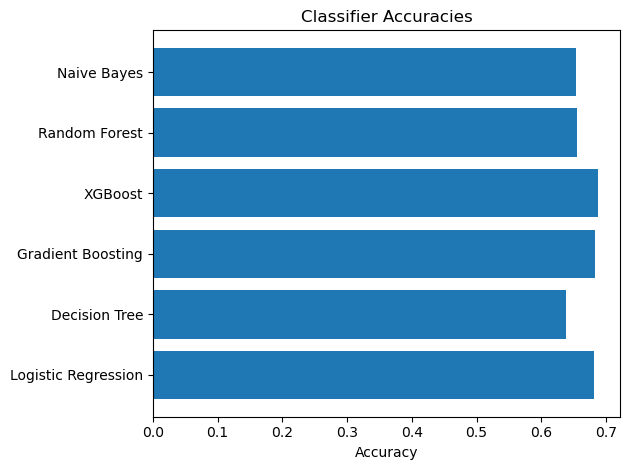

In [44]:
# Plot the accuracies
fig, ax = plt.subplots()
ax.barh(names, accuracies)
ax.set_xlabel('Accuracy')
ax.set_title('Classifier Accuracies')
plt.tight_layout()
plt.show()

In [45]:
pd.DataFrame({
    'Model' : names,
    'Accuracy': accuracies
})

,Model,Accuracy
0,Logistic Regression,0.681834
1,Decision Tree,0.638056
2,Gradient Boosting,0.682179
3,XGBoost,0.687004
4,Random Forest,0.655636
5,Naive Bayes,0.653223


# XGBoost is the best classifier with 68.7 Accuracy